In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.manifold import TSNE
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from sklearn import manifold


from sklearn.decomposition import PCA

In [ ]:
# Data sets

In [60]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

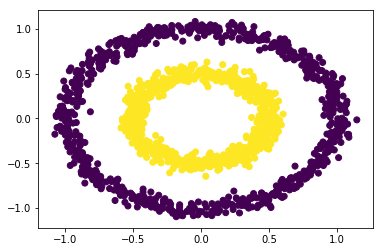

In [61]:
plt.scatter(noisy_circles[0][:,0],noisy_circles[0][:,1],c=noisy_circles[1])

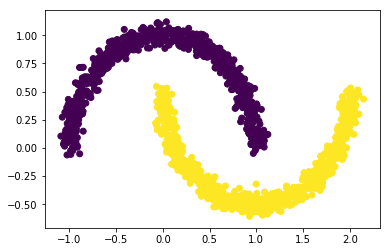

In [62]:
plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1],c=noisy_moons[1])

In [9]:
#plt.scatter(blobs[0][:,0],blobs[0][:,1],c=blobs[1])

In [8]:
#plt.scatter(no_structure[0][:,0],no_structure[0][:,1],c=no_structure[1])

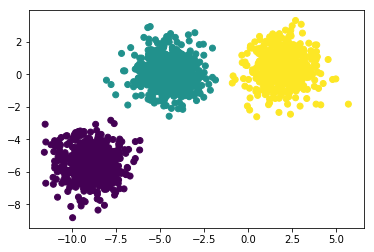

In [63]:
# blobs in 2D
plt.scatter(X[:,0],X[:,1],c=y)

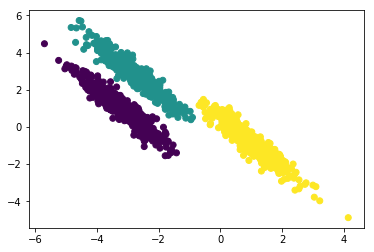

In [64]:
# anisotropic blobs
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y)

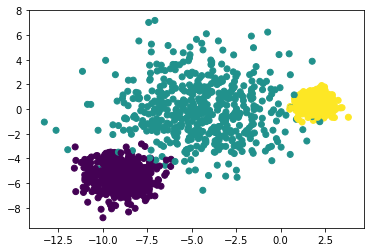

In [65]:
#blobs with different variance
plt.scatter(varied[0][:,0],varied[0][:,1],c=varied[1])

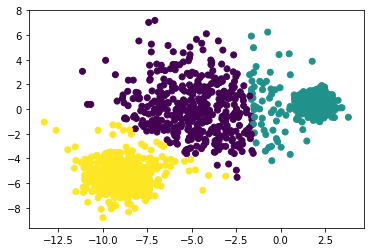

In [66]:
# K-Means clustering on blobs with different variance
kmeans=cluster.KMeans(n_clusters=3)
kmeans.fit(varied[0])
plt.scatter(varied[0][:,0],varied[0][:,1],c=kmeans.predict(varied[0]))

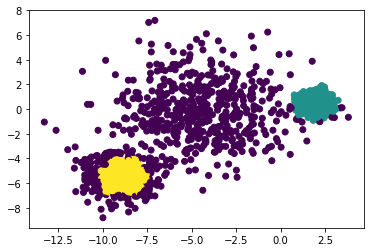

In [67]:
#DBSCAN on blobs with different variance

dbscan=cluster.DBSCAN(min_samples=40)
dbscan.fit(varied[0])
plt.scatter(varied[0][:,0],varied[0][:,1],c=dbscan.labels_)

In [41]:
# let's go higher in dimension

n_true_center=15
X, y = datasets.make_blobs(1000, 40, n_true_center)


In [42]:
np.shape(X)

(1000, 40)

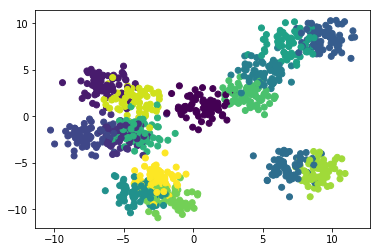

In [43]:
plt.scatter(X[:,0],X[:,1],c=y)

In [44]:
pca = PCA(n_components=40)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
Xt = pca.transform(X)

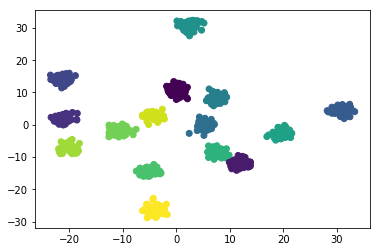

In [46]:
plt.scatter(Xt[:,0],Xt[:,1],c=y)

Text(0, 0.5, 'Standard Deviation')

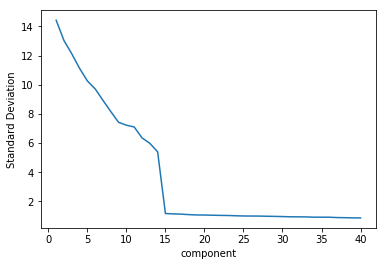

In [47]:
plt.plot(1+np.arange(len(Xt[0])),[np.std(Xt[:,i]) for i in range(len(Xt[0]))])
plt.xlabel('component')
plt.ylabel('Standard Deviation')

In [48]:
tsne = TSNE(n_components=2,perplexity=60.,n_iter=1000)

In [49]:
Xt= tsne.fit_transform(X)

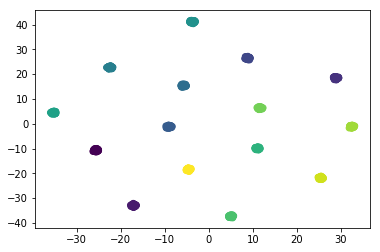

In [50]:
plt.scatter(Xt[:,0],Xt[:,1],c=y)

In [51]:
tsne = TSNE(n_components=2,perplexity=30.,n_iter=1000)

In [52]:
Xt= tsne.fit_transform(X)

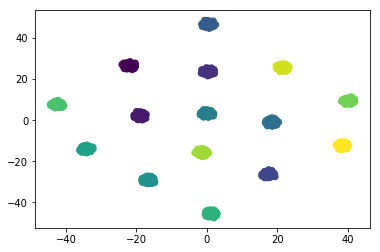

In [53]:
plt.scatter(Xt[:,0],Xt[:,1],c=y)

In [30]:
np.shape(X)
X[10]

array([ 7.04066359, -0.30282849, -8.23213619,  0.65002484, -4.75311278,
        7.74733255, -5.23540759, -1.20587245,  6.6017867 ,  8.06352173,
        2.21214141,  2.85975296,  5.03933595,  7.82716866,  3.80379355,
        8.84903008, -1.75493464, 10.16346674, -5.62833329, -4.54239167,
        1.69412394, -9.40334407, -1.56207202, 11.69726648, -1.48351015,
       -1.79436018,  8.06169008,  5.83071085, -7.78688289, -5.96140228,
        9.1955244 , -1.88945998,  2.13833632, -6.386439  ,  9.4521626 ,
        3.27110001, -9.26308197, -7.16573216,  0.153603  ,  6.94778509])

In [53]:
# MNIST data set

In [54]:
from tensorflow.keras.datasets import mnist

In [55]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [56]:
pca = PCA(n_components=200)
pca.fit(x_train.reshape(60000,28*28))

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
Xt = pca.transform(x_train.reshape(60000,28*28))

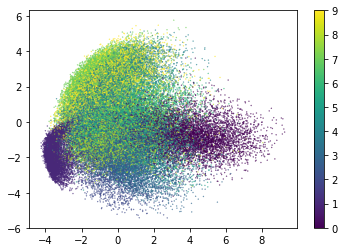

In [58]:
plt.scatter(Xt[:,0],Xt[:,1],c=y_train,s=0.1)
plt.colorbar()

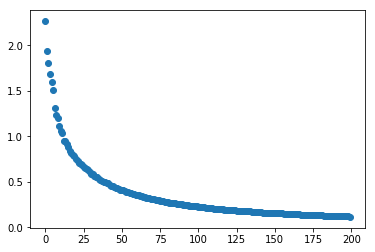

In [59]:
plt.scatter(np.arange(len(Xt[0])),[np.std(Xt[:,i]) for i in range(len(Xt[0]))])

In [75]:
tsne = TSNE(n_components=2,perplexity=30.,n_iter=1000)

In [76]:
Xtsne= tsne.fit_transform(Xt)

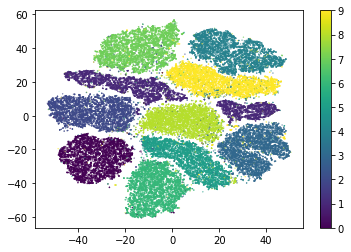

In [77]:
plt.scatter(Xtsne[:,0],Xtsne[:,1],c=y_train,s=0.1)
plt.colorbar()